# Point 1

In [1]:
# https://github.com/werberth/knn-implementation/blob/master/kNN%20Implementation%20using%20only%20Python/kNN%20Implementation%20using%20only%20Python.ipynb
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
cov1 = [[1, 0.75], [0.75, 1]]
cov2 = [[1, -0.5], [0.5, 1]]
mu1 = [1, 0]
mu2 = [0, 1]
N = 200
test_N = 50

In [2]:
# generates a gaussian random variable given mean and covariance 
def get_random_numbers(mu, cov, N):
  a = []
  for i in range(N):
    a.append(list(np.random.multivariate_normal(mu, cov)))
  return a

In [3]:
def plot_cluster(cluster, X, y):
  plt.figure(figsize=(12,10))
  plt.title("Initial centers in black, final centers in red")
  plt.scatter(X[:, 0], X[:, 1], marker='.', c=y)
  plt.scatter(cluster.centroids[:, 0], cluster.centroids[:,1], c='r')
  plt.scatter(cluster.intial_centroids[:, 0], cluster.intial_centroids[:,1], c='k')
  plt.show()

In [4]:
train1 = get_random_numbers(mu1, cov1, N)
train2 = get_random_numbers(mu2, cov2, N)
test1 = get_random_numbers(mu1, cov1, test_N)
test2 = get_random_numbers(mu2, cov2, test_N)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


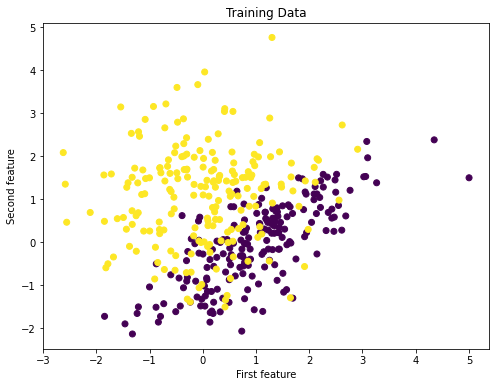

In [5]:
# Plotting actual data
fig = plt.figure(figsize=(8,6))
X = []
X += [list(i) for i in train1]
X += [list(i) for i in train2]
# X += [list(i) for i in cluster3]
X = np.array(X)
y = [1]*len(train1) + [2]*len(train2) # + [3]*len(cluster3)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Training Data")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

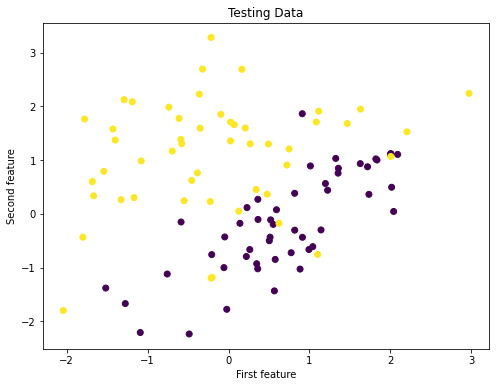

In [6]:
# Plotting actual data
fig = plt.figure(figsize=(8,6))
X = []
X += [list(i) for i in test1]
X += [list(i) for i in test2]
# X += [list(i) for i in cluster3]
X = np.array(X)
y = [1]*len(test1) + [2]*len(test2) # + [3]*len(cluster3)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Testing Data")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [7]:
[i.append(1) for i in train1]
[i.append(2) for i in train2]
train = train1 + train2
[i.append(1) for i in test1]
[i.append(2) for i in test2]
test = test1+test2

##### Define function to calculate the euclidian distance between two points
[Euclidian Distance - Wikipedia](https://en.wikipedia.org/wiki/Euclidean_distance)

In [8]:
def euclidian_dist(p1, p2):
    dim, sum_ = len(p1), 0
    for index in range(dim - 1):
        sum_ += math.pow(p1[index] - p2[index], 2)
    return math.sqrt(sum_)

##### Calculates the distance between a given sample and every other in the train set
Feeds its distances to a dictionary, the sort it and gets the nearest K neighbors;
Then it counts witch of the labels is the most recurring, and returns it. 

In [9]:
def knn(train_set, new_sample, K):
    dists, train_size = {}, len(train_set)
    
    for i in range(train_size):
        d = euclidian_dist(train_set[i], new_sample)
        dists[i] = d
    
    k_neighbors = sorted(dists, key=dists.get)[:K]
    
    qty_label1, qty_label2 = 0, 0
    for index in k_neighbors:
        if train_set[index][-1] == 1:
            qty_label1 += 1
        else:
            qty_label2 += 1
            
    if qty_label1 > qty_label2:
        return 1
    else:
        return 2

In [10]:
def get_accuracy(k):
  correct, K = 0, k
  for sample in test:
      label = knn(train, sample, K)
      if sample[-1] == label:
          correct += 1
  print("K=",k)
  print("Accuracy: %.2f%%" % (100 * correct / len(test)))

In [11]:
for i in [1, 2, 3, 4, 5, 10, 20]:
  get_accuracy(i)

K= 1
Accuracy: 81.00%
K= 2
Accuracy: 74.00%
K= 3
Accuracy: 84.00%
K= 4
Accuracy: 83.00%
K= 5
Accuracy: 88.00%
K= 10
Accuracy: 88.00%
K= 20
Accuracy: 88.00%


# Point 2
# KNN regression

In [12]:
cov1 = [[1, 0.75], [0.75, 1]]
mu1 = [1, 0]
N=300
N_test = 100
train = get_random_numbers(mu1, cov1, N)
test = get_random_numbers(mu1, cov1, N_test)
mu, sigma = 0, 0.5 # mean and standard deviation for Gaussian random noise
[i.append(i[0]*2 + i[1] + np.random.normal(mu, sigma)) for i in train]
[i.append(i[0]*2 + i[1] + np.random.normal(mu, sigma)) for i in test]
print("targets appended")


targets appended


In [13]:
def myknnregress(train_set, new_sample, K):
    dists, train_size = {}, len(train_set)
    
    for i in range(train_size):
        d = euclidian_dist(train_set[i], new_sample)
        dists[i] = d
    
    k_neighbors = sorted(dists, key=dists.get)[:K]
    
    qty_label1, qty_label2 = 0, 0
    values = []
    for index in k_neighbors:
        values.append(train_set[index][-1])
    return sum(values)/len(values)

In [14]:
def get_accuracy(k):
  sse, K = 0, k
  for sample in test:
      predicted = myknnregress(train, sample, K)
      sse += (predicted - sample[-1])**2
  print("K=",k)
  print("RMSE is:", math.sqrt(sse/len(test)))

In [15]:
for i in [1, 2, 3, 5, 10, 20, 50, 100]:
  get_accuracy(i)

K= 1
RMSE is: 0.685278473891992
K= 2
RMSE is: 0.574095606766331
K= 3
RMSE is: 0.5353630970638048
K= 5
RMSE is: 0.5101459535541647
K= 10
RMSE is: 0.5080170973675647
K= 20
RMSE is: 0.5785607880374504
K= 50
RMSE is: 0.8865958814573042
K= 100
RMSE is: 1.254794904740767


# Point 3

In [16]:
cov1 = [[1, 0.75], [0.75, 1]]
mu1 = [1, 0]
N=300
N_test = 100

In [17]:
train = get_random_numbers(mu1, cov1, N)
test = get_random_numbers(mu1, cov1, N_test)
mu, sigma = 0, 0.5 # mean and standard deviation for Gaussian random noise
[i.append(i[0]*2 + i[1] + np.random.normal(mu, sigma)) for i in train]
[i.append(i[0]*2 + i[1] + np.random.normal(mu, sigma)) for i in test]
print("targets appended")

targets appended


In [22]:
def myLWR(train_set, new_sample, K):
    dists, train_size = {}, len(train_set)
    
    for i in range(train_size):
        d = euclidian_dist(train_set[i], new_sample)
        dists[i] = [d, train_set[i]]
    k_neighbors = sorted(dists.items(), key=lambda x: x[1][0], reverse=True)[:K]
    x = np.array([i[1][1][0] for i in k_neighbors])
    y = np.array([i[1][1][1] for i in k_neighbors])
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    # print(m,c)
    value = (m*new_sample[0] + c)
    return value

In [19]:
def get_accuracy(k):
  sse, K = 0, k
  for sample in test:
      predicted = myLWR(train, sample, K)
      sse += (predicted - sample[-1])**2
  print("K=",k)
  print("RMSE is:", math.sqrt(sse/len(test)))

In [23]:
for i in [1, 2, 3, 5, 10, 20, 50, 100]:
  get_accuracy(i)
  

K= 1
RMSE is: 2.610546619435418
K= 2
RMSE is: 10.27444432088117
K= 3
RMSE is: 8.664271510016356
K= 5
RMSE is: 7.716013576069756
K= 10
RMSE is: 5.8333233196571515
K= 20
RMSE is: 5.007624772788164
K= 50
RMSE is: 4.1662019622684765
K= 100
RMSE is: 3.841883542733365
